In [ ]:
%pip install google-colab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/new data"

/content/drive/MyDrive/new data


In [ ]:
# !unzip recycling\ waste.zip

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# let's prepare the data and generate the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen_train = ImageDataGenerator(rescale = 1/255, shear_range = 0.2, zoom_range = 0.2,
                               brightness_range = (0.1, 0.5), horizontal_flip=True)

train_data = gen_train.flow_from_directory("/content/drive/MyDrive/new data/recycling waste",
                                           target_size = (224, 224), batch_size = 32, class_mode="categorical")


Found 6319 images belonging to 7 classes.


In [5]:
# let's create a model
# here i'm going to use VGG16 model's parameter to solve this problem

from tensorflow.keras.applications.vgg16 import VGG16

# here i'm going to take input shape, weights and bias from imagenet and include top False means
# i want to add input, flatten and output layer by my self

vgg16 = VGG16(input_shape = (224, 224, 3), weights = "imagenet", include_top = False)

58889256/58889256 [==============================] - 0s 0us/step


In [6]:
# now vgg16 weights are already train so i don't want to train that weights again
# so let's make trainable = False

for layer in vgg16.layers:
  layer.trainable = False

In [7]:
# let's add flatten layer or let's connect VGG16 with our own flatten layer

from tensorflow.keras import layers

x = layers.Flatten()(vgg16.output)

In [13]:
# now let's add output layers or prediction layer

prediction = layers.Dense(units = 7, activation="softmax")(x)

# creating a model object

model = tf.keras.models.Model(inputs = vgg16.input, outputs=prediction)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [16]:
# now let's compile the model

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics =["accuracy"])

result = model.fit_generator(train_data, epochs = 10, steps_per_epoch=len(train_data))

<ipython-input-16-d5217e61c448>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  result = model.fit_generator(train_data, epochs = 10, steps_per_epoch=len(train_data))


Epoch 1/10
198/198 [==============================] - 1369s 7s/step - loss: 1.6643 - accuracy: 0.3872
Epoch 2/10
198/198 [==============================] - 130s 656ms/step - loss: 1.4527 - accuracy: 0.4754
Epoch 3/10
198/198 [==============================] - 130s 657ms/step - loss: 1.3644 - accuracy: 0.5004
Epoch 4/10
198/198 [==============================] - 130s 657ms/step - loss: 1.2628 - accuracy: 0.5344
Epoch 5/10
198/198 [==============================] - 129s 649ms/step - loss: 1.2006 - accuracy: 0.5583
Epoch 6/10
198/198 [==============================] - 130s 653ms/step - loss: 1.1559 - accuracy: 0.5697
Epoch 7/10
198/198 [==============================] - 130s 655ms/step - loss: 1.1110 - accuracy: 0.5879
Epoch 8/10
198/198 [==============================] - 131s 662ms/step - loss: 1.0576 - accuracy: 0.6060
Epoch 9/10
198/198 [==============================] - 130s 655ms/step - loss: 1.0540 - accuracy: 0.6075
Epoch 10/10
198/198 [==============================] - 130s 655ms/

In [22]:
model.save("classifyWaste.h5")

In [23]:
from tensorflow.keras.preprocessing import image

model = tf.keras.models.load_model("/content/classifyWaste.h5")

output_class = ["biodegradable", "e-waste", "medical", "recyclable-glass", "recyclable-metal", "recyclable-paper", "recyclable-plastic"]
def waste_prediction(new_image):
  test_image = image.load_img(new_image, target_size = (224,224))
  plt.axis("off")
  plt.imshow(test_image)
  plt.show()

  test_image = image.img_to_array(test_image) / 255
  test_image = np.expand_dims(test_image, axis=0)

  predicted_array = model.predict(test_image)
  predicted_value = output_class[np.argmax(predicted_array)]
  predicted_accuracy = round(np.max(predicted_array) * 100, 2)

  print("Your waste material is ", predicted_value, " with ", predicted_accuracy, " % accuracy")


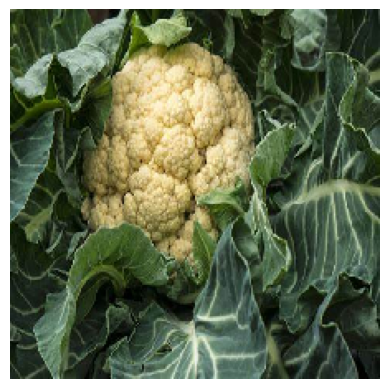

1/1 [==============================] - 2s 2s/step
Your waste material is  biodegradable  with  97.07  % accuracy


In [24]:
waste_prediction("/content/cauliflower.jpg")

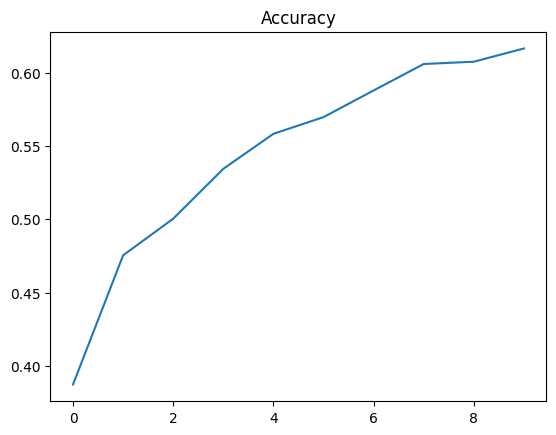

In [25]:
plt.title("Accuracy")
plt.plot(result.history["accuracy"])
plt.show()

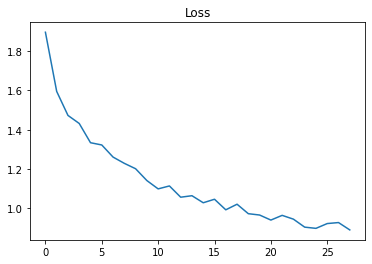

In [ ]:
plt.title("Loss")
plt.plot(result.history["loss"])
plt.show()